# UG Project - Traffic Accident Analysis - Machine Learning

In continuation to [UG-392](https://github.com/harshsinghal00/UG-Project/blob/main/UG%20Project%20CE-392.ipynb)


## Importing needed Libraries

In [1]:
#Import modules
import numpy as np
import pandas as pd
import time
import timeit

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import math

#warning ignorer
import warnings
warnings.filterwarnings("ignore")

#sklearn
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample


Bad key "text.kerning_factor" on line 4 in
C:\Ac\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Importing needed Datasets

Preprocessing and Exploratory Data Analysis can be found [here](https://github.com/harshsinghal00/UG-Project/blob/main/UG%20Project%20CE-392.ipynb).

In [12]:
df = pd.read_csv('2016_combined_filled.csv', parse_dates=['Date'])

In [7]:
pd.set_option('display.max_columns', None)

In [196]:
df.head()

,Unnamed: 0,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Age_Band_of_Driver,Hour,Month,Daytime,Seriousness
0,0,2016010000005,-0.279323,51.584754,1,3,2,1,2016-11-01,3,02:30,28,E09000005,3,4006,6.0,30.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1,1,1,Car,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,51.0,3,1.0,4,2,11,"Night Hours (22,6)",Not Serious
1,1,2016010000005,-0.279323,51.584754,1,3,2,1,2016-11-01,3,02:30,28,E09000005,3,4006,6.0,30.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1,1,2,Motorcycle,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,23.0,2,1.0,2,2,11,"Night Hours (22,6)",Not Serious
2,2,2016010000006,0.184928,51.449595,1,3,1,1,2016-11-01,3,00:37,18,E09000004,3,207,6.0,30.0,9.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,1,1,Car,0.0,18.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,6.0,2.0,36.0,1,1.0,3,0,11,"Night Hours (22,6)",Not Serious
3,3,2016010000008,-0.473837,51.543563,1,3,1,1,2016-11-01,3,01:25,26,E09000017,3,4020,1.0,30.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,1,1,Car,0.0,18.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,24.0,2,1.0,2,1,11,"Night Hours (22,6)",Not Serious
4,4,2016010000016,-0.164442,51.404958,1,3,1,1,2016-11-01,3,09:15,22,E09000024,3,217,6.0,30.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1,1,Bus,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,55.0,3,1.0,4,9,11,"Morning Rush (6,10)",Not Serious


### Changing Variable names for beter classification

In [197]:
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].replace({0:'0',1:'1',2:'2',3:'3','3+':'4'})

In [198]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].replace({0:'0',1:'1',2:'2',3:'3',4:'4','4+':'5'})

In [199]:
df['Day_of_Week'] = df['Day_of_Week'].replace({1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri',7:'Sat'})

In [200]:
df['Month'] = df['Month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [201]:
df['1st_Road_Class'] = df['1st_Road_Class'].replace({1:'Motorway',2:'A(M)',3:'A',4:'B',5:'C',6:'Unclassified'})

In [202]:
df = df.drop(columns=['1st_Road_Number','Longitude','Latitude','Local_Authority_(District)','Local_Authority_(Highway)'], axis=1)

In [203]:
df = df.drop(columns=['Accident_Index','Unnamed: 0'], axis=1)

In [204]:
df['Road_Type'] = df['Road_Type'].replace({1:'Roundabout',2:'One way Street',3:'Dual Carriageway',6:'Single Carriageway',7:'Slip Road',9:'Unknown'})

In [205]:
df['Speed_limit'] = df['Speed_limit'].replace({20:'20 mph',30:'30 mph',40:'40 mph',50:'50 mph',60:'60 mph',70:'70 mph'})

In [206]:
df['Junction_Detail'] = df['Junction_Detail'].replace({0:'Not at junction or within 20 metres',1:'Roundabout',2:'Mini-Roundabout',3:'T or Staggered Junction',5:'Slip Road',6:'Crossroads',7:'More than 4 arms (Not Roundabout)',8:'Private drive or Entrance',9:'Other Junction'})

In [207]:
df['Light_Conditions'] = df['Light_Conditions'].replace({1:'Daylight',4:'Darkness - Lights Lit',5:'Darkness - Lights Unlit',6:'Darkness - No Lighting',7:'Darkness - Lighting Unknown'})

In [208]:
df['Weather_Conditions'] = df['Weather_Conditions'].replace({1:'Fine, No High Winds',2:'Raining, No High Winds',3:'Snowing, No High Winds',4:'Fine + High Winds',5:'Raining + High Winds',6:'Snowing + High Winds',7:'Fog or Mist',8:'Other',9:'Unknown'})

In [209]:
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].replace({1:'Dry',2:'Wet or Damp',3:'Snow',4:'Frost of Ice',5:'Flood over 3 cm. deep'})

In [210]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace({1:'Urban',2:'Rural',3:'Unallocated'})

In [211]:
df['Vehicle_Manoeuvre'] = df['Vehicle_Manoeuvre'].replace({1:'Reversing', 2:'Parked', 3:'Waiting to go - held up',
                                        4:'Slowing or stopping', 5:'Moving off', 6:'U-turn',
                                        7:'Turning left', 8:'Waiting to turn left', 9:'Turning right',
                                        10:'Waiting to turn right', 11:'Changing lane to left', 12:'Changing lane to right',
                                        13:'Overtaking moving vehicle - offside', 14:'Overtaking static vehicle - offside',
                                        15:'Overtaking - nearside', 16:'Going ahead left-hand bend',
                                        17:'Going ahead right-hand bend', 18:'Going ahead other'})

In [212]:
df['Junction_Location'] = df['Junction_Location'].replace({0:'Not at or within 20 metres of junction', 1:'Approaching junction or waiting/parked at junction approach',
                            2:'Cleared junction or waiting/parked at junction exit', 3:'Leaving roundabout',
                            4:'Entering roundabout', 5:'Leaving main road', 6:'Entering main road',
                            7:'Entering from slip road', 8:'Mid Junction - on roundabout or on main road'})

In [213]:
df['1st_Point_of_Impact'] = df['1st_Point_of_Impact'].replace({0:'Did not Impact', 1:'Front', 2:'Back', 3:'Offside', 4:'Nearside'})

In [214]:
df['Sex_of_Driver'] = df['Sex_of_Driver'].replace({1:'Male', 2:'Female', 3:'Not known'})

In [215]:
df['Age_Band_of_Driver'] = df['Age_Band_of_Driver'].replace({1:'0-15', 2:'16-25', 3:'26-45', 4:'46-65', 5:'65+'})

In [216]:
df['Age_of_Vehicle'] = df['Age_of_Vehicle'].replace({1:'0-2', 2:'3-5', 3:'6-8', 4:'9-12', 5:'13-15', 6:'16-22', 7:'22+'})

In [217]:
df = df.drop(columns=['Police_Force','Date','Time','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'
                     ,'Special_Conditions_at_Site','Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident'
                     ,'Vehicle_Reference','Towing_and_Articulation','Vehicle_Location-Restricted_Lane','Skidding_and_Overturning'
                     ,'Hit_Object_in_Carriageway','Vehicle_Leaving_Carriageway','Hit_Object_off_Carriageway'
                     ,'Was_Vehicle_Left_Hand_Drive?','Journey_Purpose_of_Driver','Age_of_Driver','Driver_Home_Area_Type'])

In [218]:
df = df.drop(columns=['Accident_Severity'])

In [219]:
df['Hour'] = df['Hour'].astype('object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248589 entries, 0 to 248588
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Number_of_Vehicles       248589 non-null  object
 1   Number_of_Casualties     248589 non-null  object
 2   Day_of_Week              248589 non-null  object
 3   1st_Road_Class           248589 non-null  object
 4   Road_Type                248589 non-null  object
 5   Speed_limit              248589 non-null  object
 6   Junction_Detail          248589 non-null  object
 7   Light_Conditions         248589 non-null  object
 8   Weather_Conditions       248589 non-null  object
 9   Road_Surface_Conditions  248589 non-null  object
 10  Urban_or_Rural_Area      248589 non-null  object
 11  Vehicle_Type             248589 non-null  object
 12  Vehicle_Manoeuvre        248589 non-null  object
 13  Junction_Location        248589 non-null  object
 14  1st_Point_of_Impact 

In [221]:
df.describe(include='all')

,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Vehicle_Manoeuvre,Junction_Location,1st_Point_of_Impact,Sex_of_Driver,Age_of_Vehicle,Age_Band_of_Driver,Hour,Month,Daytime,Seriousness
count,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589,248589
unique,4,5,7,6,6,6,9,5,9,5,2,5,18,9,5,3,7,5,24,12,5,2
top,2,1,Fri,A,Single Carriageway,30 mph,Not at junction or within 20 metres,Daylight,"Fine, No High Winds",Dry,Urban,Car,Going ahead other,Not at or within 20 metres of junction,Front,Male,6-8,26-45,17,Nov,"Office Hours (10,16)",Not Serious
freq,163011,184368,41215,115593,181798,150322,100270,183215,206671,183290,157618,182238,119357,100274,121892,161808,98126,122647,22606,22283,88239,208584


In [223]:
df.head()

,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Vehicle_Manoeuvre,Junction_Location,1st_Point_of_Impact,Sex_of_Driver,Age_of_Vehicle,Age_Band_of_Driver,Hour,Month,Daytime,Seriousness
0,2,1,Tue,A,Single Carriageway,30 mph,Not at junction or within 20 metres,Darkness - Lights Unlit,"Fine, No High Winds",Dry,Urban,Car,U-turn,Not at or within 20 metres of junction,Offside,Male,6-8,46-65,2,Nov,"Night Hours (22,6)",Not Serious
1,2,1,Tue,A,Single Carriageway,30 mph,Not at junction or within 20 metres,Darkness - Lights Unlit,"Fine, No High Winds",Dry,Urban,Motorcycle,Going ahead other,Not at or within 20 metres of junction,Front,Male,3-5,16-25,2,Nov,"Night Hours (22,6)",Not Serious
2,1,1,Tue,A,Single Carriageway,30 mph,Other Junction,Darkness - Lights Lit,"Fine, No High Winds",Dry,Urban,Car,Going ahead other,Cleared junction or waiting/parked at junction...,Nearside,Female,0-2,26-45,0,Nov,"Night Hours (22,6)",Not Serious
3,1,1,Tue,A,Roundabout,30 mph,Roundabout,Darkness - Lights Lit,"Fine, No High Winds",Dry,Urban,Car,Going ahead other,Entering roundabout,Front,Male,3-5,16-25,1,Nov,"Night Hours (22,6)",Not Serious
4,1,1,Tue,A,Single Carriageway,30 mph,T or Staggered Junction,Daylight,"Fine, No High Winds",Dry,Urban,Bus,Going ahead other,Approaching junction or waiting/parked at junc...,Did not Impact,Male,6-8,46-65,9,Nov,"Morning Rush (6,10)",Not Serious


In [224]:
import pickle
#with open('final_df_for_ml', 'wb') as file:
#    pickle.dump(df, file)

In [225]:
#with open('final_df_for_ml', 'rb') as file:
#    dff = pickle.load(file)

## Machine Learning

In [227]:
#Set up of X and Y
X= df.drop(['Seriousness'],axis=1)
y= df['Seriousness']

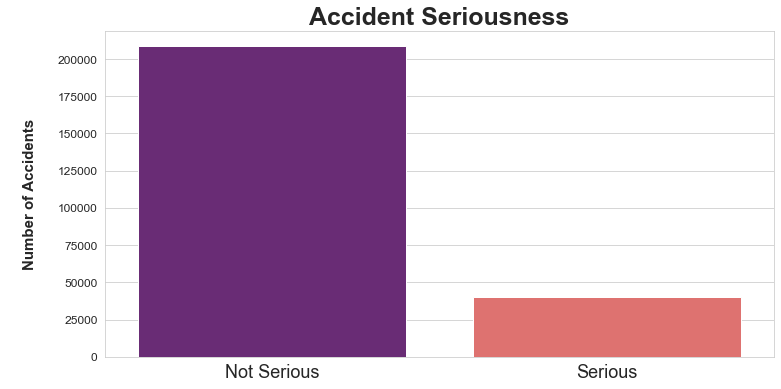

In [228]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Seriousness', palette="magma", data=df)

sns.set_style('whitegrid')
plt.title("Accident Seriousness",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12);

### Imbalanced Data

The data in this dataset is extremely imbalanced for what we are trying to predict. We are going to resample the data as undersampling, where we reduce the number of majority (Not Serious Accidents) samples.

### Resampling

In [303]:
# Label Encoding
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [304]:
# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [305]:
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [306]:
# separate minority and majority classes
not_serious = res_X[res_X.Seriousness=='Not Serious']
serious = res_X[res_X.Seriousness=='Serious']

In [307]:
# decrease majority
not_serious_decreased = resample( not_serious,
                                  replace=True, # sample with replacement
                                  n_samples=len(serious), # match number in majority class
                                  random_state=1) # reproducible results

In [308]:
# combine majority and severe_increased minority
newdf = pd.concat([serious, not_serious_decreased])

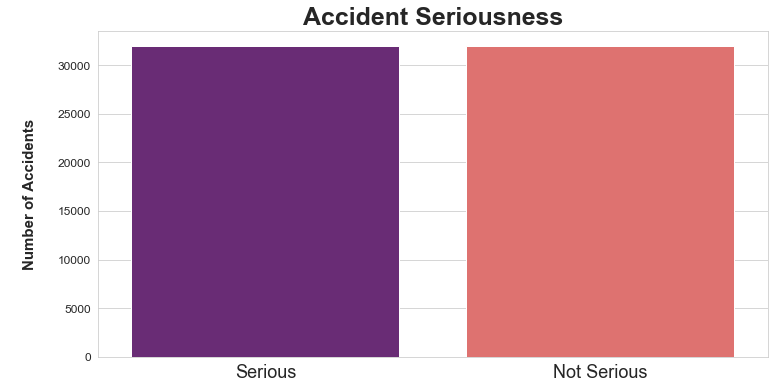

In [309]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Seriousness', palette="magma", data=newdf)

sns.set_style('whitegrid')
plt.title("Accident Seriousness",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12);

In [310]:
res_X_train = newdf.drop('Seriousness', axis=1)
res_y_train = newdf.Seriousness

### Supervised Learning with Random Forest

We are going to run Random Forest Classifier algorithm , gather the results of some scoring metrics (Accuracy, Log Loss, Cross Validation, Recall, Roc Auc, F1, False Positive Rate, Error Rate), and put those scores into a dataframe

In [312]:
classifier = RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X.shape[1], 
                                    min_samples_split=8, n_estimators=500, random_state=1)

In [425]:
classifier.fit(res_X_train, res_y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, max_features=21,
                       min_samples_split=8, n_estimators=500, random_state=1)

In [426]:
name = classifier.__class__.__name__
y_pred = classifier.predict(res_X_test)

In [427]:
#confusion matrix plot function
def cm_plot(var):
    plt.figure(figsize=(20,8))
    sns.set_style('white')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab10')
    classNames = ['Not Serious','Serious']
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual\n', fontsize=14)
    plt.xlabel('Predicted\n', fontsize=14)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=12)
    plt.yticks(tick_marks, classNames, fontsize=12)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='white', fontsize=14)
    plt.show()

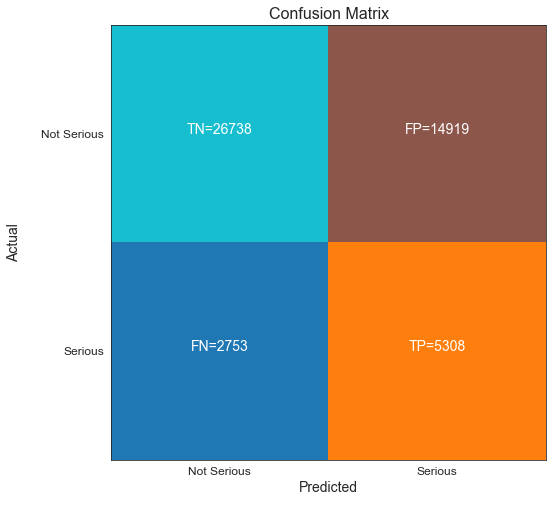

In [428]:
cm = confusion_matrix(res_y_test, y_pred)

cm_plot(cm)

#FPR and Error Rate setup
tn, fp, fn, tp = confusion_matrix(res_y_test,y_pred).ravel()

acc = accuracy_score(res_y_test, y_pred)
pre= tp/(tp+fp)
rec= tp/(tp+fn)
f1s= 2*pre/(pre+rec)
#putting results in df
res_cols=["Classifier", "Accuracy", "Precision", "Recall","F1 Score"]
results = pd.DataFrame(columns=res_cols)
results_final = pd.DataFrame([[name, round(acc*100,3),round(pre*100,3),round(rec*100,3),round(f1s*100,3)]],
                               columns=res_cols)
results = results.append(results_final)

In [429]:
results

,Classifier,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,64.456,26.242,65.848,56.992
